In [5]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
key = jax.random.PRNGKey(42)
def make_data(key, n_samples = 500, mean = jnp.array([1, 1]), sigma = jnp.array([1, 1])):
    return mean + sigma * jax.random.normal(key, shape = (n_samples,2))

In [98]:
key1, key2 = jax.random.split(key)
n_samples = 1000
X1 = make_data(key1, n_samples, mean= jnp.array([0, 0]), sigma= jnp.array([1, 2]))
X2 = make_data(key2, n_samples, mean=jnp.array([5, 4]), sigma=jnp.array([1, 3]))
y1 = jnp.zeros((n_samples,1))
y2 = jnp.ones((n_samples,1))
X1 = jnp.hstack([X1, y1])
X2 = jnp.hstack([X2, y2])
X = jnp.stack([X1, X2])

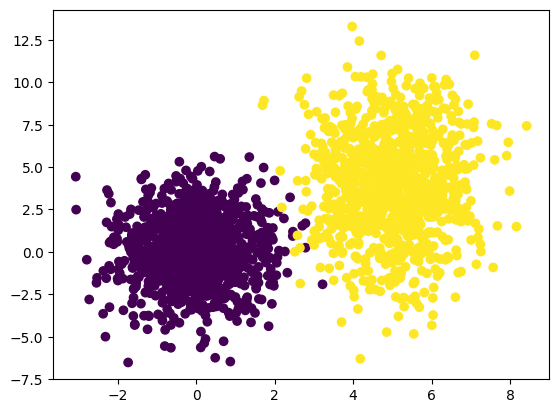

In [99]:
# test
plt.scatter(X[:,:,0], X[:,:,1], c=X[:,:,2])

Array([[ 9.53147888e+00,  1.80322456e+01,  1.11028309e+01,
         1.30331268e+01, -4.91825199e+00,  1.05234222e+01,
         2.06519928e+01,  8.85032463e+00,  9.13457203e+00,
         3.11436272e+00, -5.70209408e+00,  4.16475153e+00,
         1.03751478e+01,  2.17247009e+01,  1.81757927e+01,
         9.01020336e+00,  1.57227564e+01,  4.43833160e+00,
         6.74522781e+00, -4.67203140e-01,  1.11002502e+01,
         8.34307861e+00,  1.11000652e+01,  7.07380676e+00,
         9.98965454e+00,  9.13469124e+00,  7.22468901e+00,
         1.50761070e+01,  8.10003185e+00,  8.98263550e+00,
         2.05410423e+01,  8.97523880e+00,  1.84256821e+01,
        -7.00610542e+00,  1.14024725e+01,  1.57006130e+01,
         8.37253571e+00,  1.41363621e+01,  9.12585163e+00,
         7.18768167e+00,  5.98710632e+00,  3.26884174e+00,
         1.40364027e+00,  8.91916084e+00,  1.18521223e+01,
         1.51203365e+01,  1.44059048e+01,  1.04404202e+01,
         2.86106682e+00,  4.74302816e+00,  5.70616198e+0

In [ ]:
X